### Your Name Here: Li JIang
### Your TF Name: Kaleigh Douglas
### Graduate Project

### Introduction 

Distinguishing forged banknotes from real ones remains a challenge without utilizing specialized instruments. The goal of my graduate project is to develop a classification algorithm to differentiate authentic vs counterfeit bank notes.
<br /><br />
The raw data was extracted from images based on genuine and forged banknote-like specimens. These specimens were recorded by an industrial camera and the final images have 400 x 400 pixels, which were processed into gray-scale pictures with a resolution of ~660dpi. Features were extracted using wavelet transform tool, including variance, skewness, curtosis and entropy of the transformed image. In addition, each specimen is labeled either genuine or forged, which is the target of predictions. 
<br /><br />
In this graduate project, I aim to evaluate the accuracy and other related classifications score of different classification algorithms (including logistic regression, LDA, KNN and Naïve Bayes) using cross validation. Then I will compare different algorithms to find the one with best performance on the test set and discuss the possible underlying reason.

### Step 1: Loading the raw data
The first step is to load all required libraries and the raw data and give each column an informative name. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [2]:
## variable names correspond to 'variation', 'skewness', 'curtosis', 'entropy' and 'authenticity'
## Among which 'authenticity' is the target for prediction 
df_banknote = pd.read_csv('../data/data_banknote_authentication.txt', header = None, 
                       names = ["var","skew","curt","entr","auth"])
df_banknote.head()

,var,skew,curt,entr,auth
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
## Check the data type of each variable and dimension of the data
display(df_banknote.dtypes)
display(df_banknote.shape)

var     float64
skew    float64
curt    float64
entr    float64
auth      int64
dtype: object

(1372, 5)

### Step 2: Preprocessing the raw data
The second step is to preprocess the data, e.g. remove null values, variable normalization/transformation, categorical variables conversion. 

In [4]:
## Check if there is any missing value
df_banknote.isnull().any()

var     False
skew    False
curt    False
entr    False
auth    False
dtype: bool

Fortunately, the data is "abnormally“ clean, without any missing values. The next step is to check the range/scale of each variable.

In [5]:
df_banknote.describe()

,var,skew,curt,entr,auth
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


It looks like that all predictor variables are in similar range/scale, so normalization or log-transformation is not necessary. Then I would like to check if the target is balanced, i.e. whether authentic and fake banknotes are in similar quantity. 

In [6]:
df_banknote["auth"].value_counts()

0    762
1    610
Name: auth, dtype: int64

Indeed they do: the numbers of authentic and fake banknotes are very close. Then the data is ready for some exploratory analysis

### Step 3: Exploratory analysis
The third step is some exploratory analysis, mainly to explore the relationship between each predictor variable and target variable. 

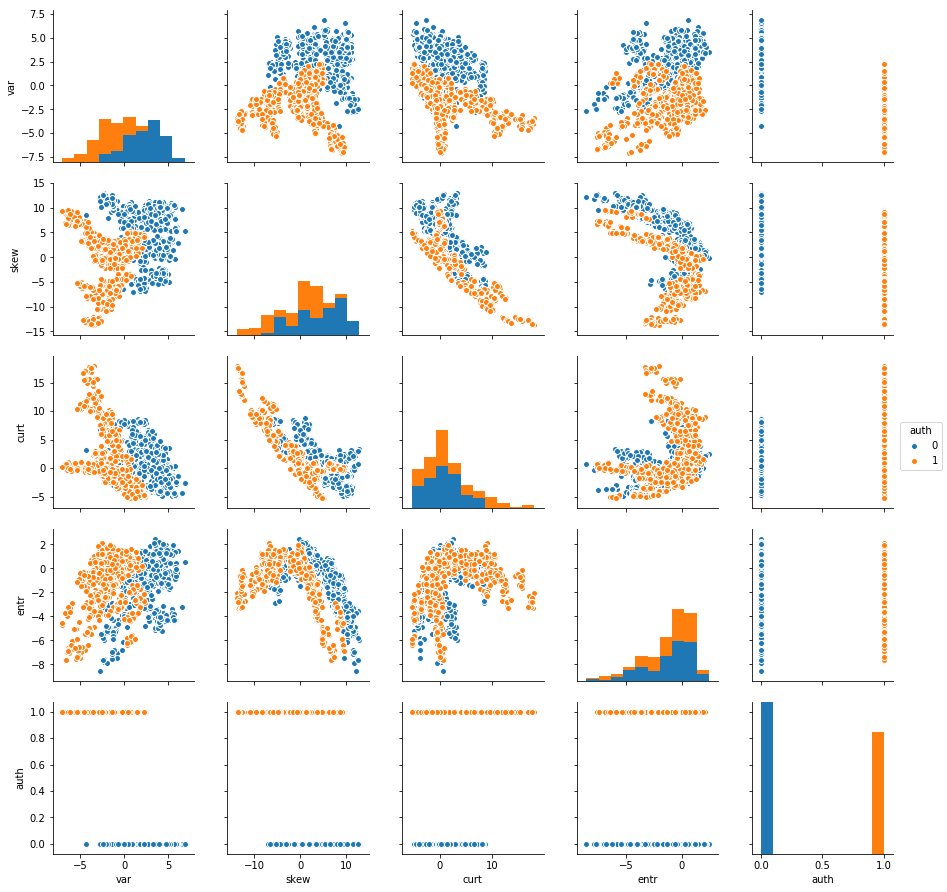

In [7]:
%matplotlib inline
import seaborn as sns
sns.pairplot(df_banknote,hue="auth")

"Variation" ('var'), "Skewness" ('skew') and "Curtosis" ('curt') appear to well separate forged and authentic banknotes, so these three variables will be ideal variables for building classification models. "Entropy" ('entr'), on the other hand, exhibits limited power in distinguishing fake vs authentic banknotes, so it is questionable to include this variable or not. 

### Step 4: An example analysis by KNN 
Next, I will show an example using KNN to build a classification model. I will use randomly assigned training and testing set for model construction and evaluation (confusion matrix and accuracy/sensitivity/specificity).

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Generate training and testing set, including all predictor variables  
InputTrain, InputTest, LabelTrain, LabelTest = train_test_split(df_banknote.drop(["auth"], axis = 1),
                                                                df_banknote["auth"], test_size = 0.3, 
                                                                random_state = 5)

## Create an KNN classifier with K = 5
knn_5 = KNeighborsClassifier(n_neighbors=5)
## Fit the model to the training set
knn_5.fit(InputTrain,LabelTrain)

## Accuracy of the KNN (K=5) model 
knn_5.score(InputTest, LabelTest)

1.0

KNN shows incredible performance here: it basically classifies every banknote correctly. 

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Use KNN model to predict authenticity of banknotes in the test set
LabelPred = knn_5.predict(InputTest)

# Generate the confusion matrix and classification report
print ("THIS IS THE CONFUSION MATRIX")
print(confusion_matrix(LabelTest, LabelPred))
print ("THIS IS THE CLASSIFICATION REPORT")
print(classification_report(LabelTest, LabelPred))

THIS IS THE CONFUSION MATRIX
[[222   0]
 [  0 190]]
THIS IS THE CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       222
          1       1.00      1.00      1.00       190

avg / total       1.00      1.00      1.00       412



Undoubtedly, the confusion matrix and classification report show 100% sensitivity and specificity. How about re-building the model using a different K, e.g. 50?

In [10]:
## Create an KNN classifier with K = 50
knn_50 = KNeighborsClassifier(n_neighbors=50)
## Fit the model to the training set
knn_50.fit(InputTrain,LabelTrain)

## Accuracy of the KNN (K=5) model 
knn_50.score(InputTest, LabelTest)

0.9805825242718447

Larger K results in slighlty reduced accuracy of the model, which indicates that too large K leads to under-fitting.

In [11]:
## Use KNN (K=50) model to predict authenticity of banknotes in the test set
LabelPred = knn_50.predict(InputTest)

# Generate the confusion matrix and classification report
print ("THIS IS THE CONFUSION MATRIX")
print(confusion_matrix(LabelTest, LabelPred))
print ("THIS IS THE CLASSIFICATION REPORT")
print(classification_report(LabelTest, LabelPred))

THIS IS THE CONFUSION MATRIX
[[214   8]
 [  0 190]]
THIS IS THE CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       1.00      0.96      0.98       222
          1       0.96      1.00      0.98       190

avg / total       0.98      0.98      0.98       412



The confusion matrix and classification report show that 8 of the fake banknotes are incorrectly classified authentic, so the sensitivity decreases to ~96%. Next, I will examine the performance of more models. 

### Step 5: Performance of different classification models using cross validation 
Step 5 is to use cross validation to evaludate the performance of different classification models (logistic, LDA, KNN and Naive Bayes). The metrics for performance evaluation include accuracy, sensitivity and specificity. 

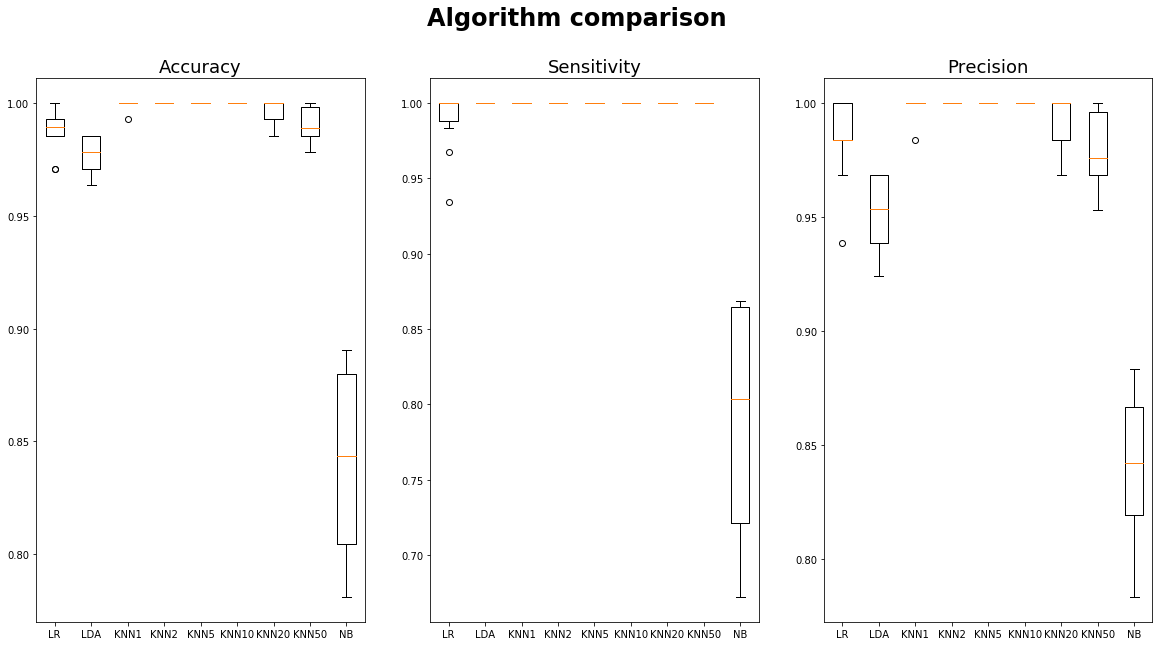

In [12]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN1', KNeighborsClassifier(n_neighbors=1)))
models.append(('KNN2', KNeighborsClassifier(n_neighbors=2)))
models.append(('KNN5', KNeighborsClassifier(n_neighbors=5)))
models.append(('KNN10', KNeighborsClassifier(n_neighbors=10)))
models.append(('KNN20', KNeighborsClassifier(n_neighbors=20)))
models.append(('KNN50', KNeighborsClassifier(n_neighbors=50)))
models.append(('NB', GaussianNB()))

# Define X and y
X = df_banknote.drop(["auth"],axis = 1)
y = df_banknote["auth"]

# evaluate each model in turn 
# use accuracy, sensitivity as well as precision 
accuracy = []
sensitivity = []
precision = []
names = []

for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)
    accuracy.append(model_selection.cross_val_score(model, X, y, cv=kfold, scoring='accuracy'))
    sensitivity.append(model_selection.cross_val_score(model, X, y, cv=kfold, scoring='recall'))
    precision.append(model_selection.cross_val_score(model, X, y, cv=kfold, scoring='precision'))
    names.append(name)

# boxplot algorithm comparison
plt.figure(figsize=(20, 10))

## Plot accuracy 
plt.subplot(131)
plt.title('Accuracy', fontsize=18)
plt.boxplot(accuracy)
plt.xticks(np.arange(1,10),names)

## Plot sensitivity
plt.subplot(132)
plt.title('Sensitivity', fontsize=18)
plt.boxplot(sensitivity)
plt.xticks(np.arange(1,10),names)

## Plot precision
plt.subplot(133)
plt.title('Precision', fontsize=18)
plt.boxplot(precision)
plt.xticks(np.arange(1,10),names)

plt.suptitle("Algorithm comparison", fontsize=24, fontweight='bold')
plt.show()

## Conclusion

In this project, I evaluate accuracies, sensitivities and precisions for logistic regression, LDA, KNN (with different K) and naive bayes on this banknote dataset using 10-fold cross-validation. Overall, most models make nearly perferct classifications on this dataset, but different models still show varied performances, which will be discussed below:

1. KNN with K <= 10 appears to exhibit the most optimal performance, with almost perferct accuracy, sensitivity and precision. However, the performance of KNN begins to degrade with bigger K when K > 10, indicating impact of increasing bias on KNN performance. 
2. Naive Bayes classifier appears to exhibit the worst performance, with all metrix ranging from 0.8 to 0.85. This is probably because several variables are highly correlated with each other, violating the assumptions of Naive Bayes. 
3. Logistic regression and LDA exhibit intermediate performances and both models produce false positives and negatives. 

These observations indicate that the decision boundary between two classes in this dataset is probably non-linear so that linear methods such logistic regression and LDA do not model it as effectively as the KNN approach with smaller K value.